# Dataset Information
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity,
3 - citric acid,
4 - residual sugar,
5 - chlorides,
6 - free sulfur dioxide,
7 - total sulfur dioxide,
8 - density,
9 - pH,
10 - sulphates,
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score,confusion_matrix,recall_score,f1_score,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('winequality-white.csv',delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
# Statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# Data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
# Checking for null value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

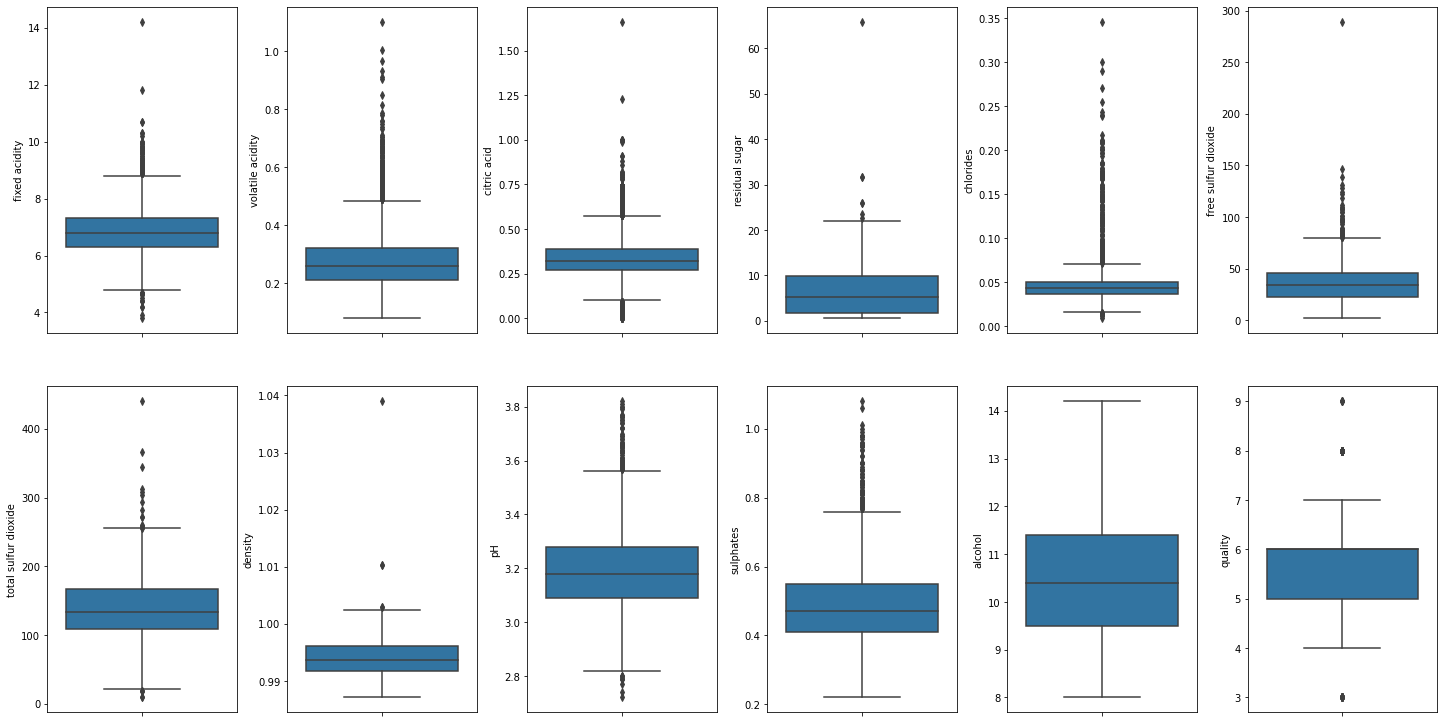

In [7]:
# create boxplot checking for outliers
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)        

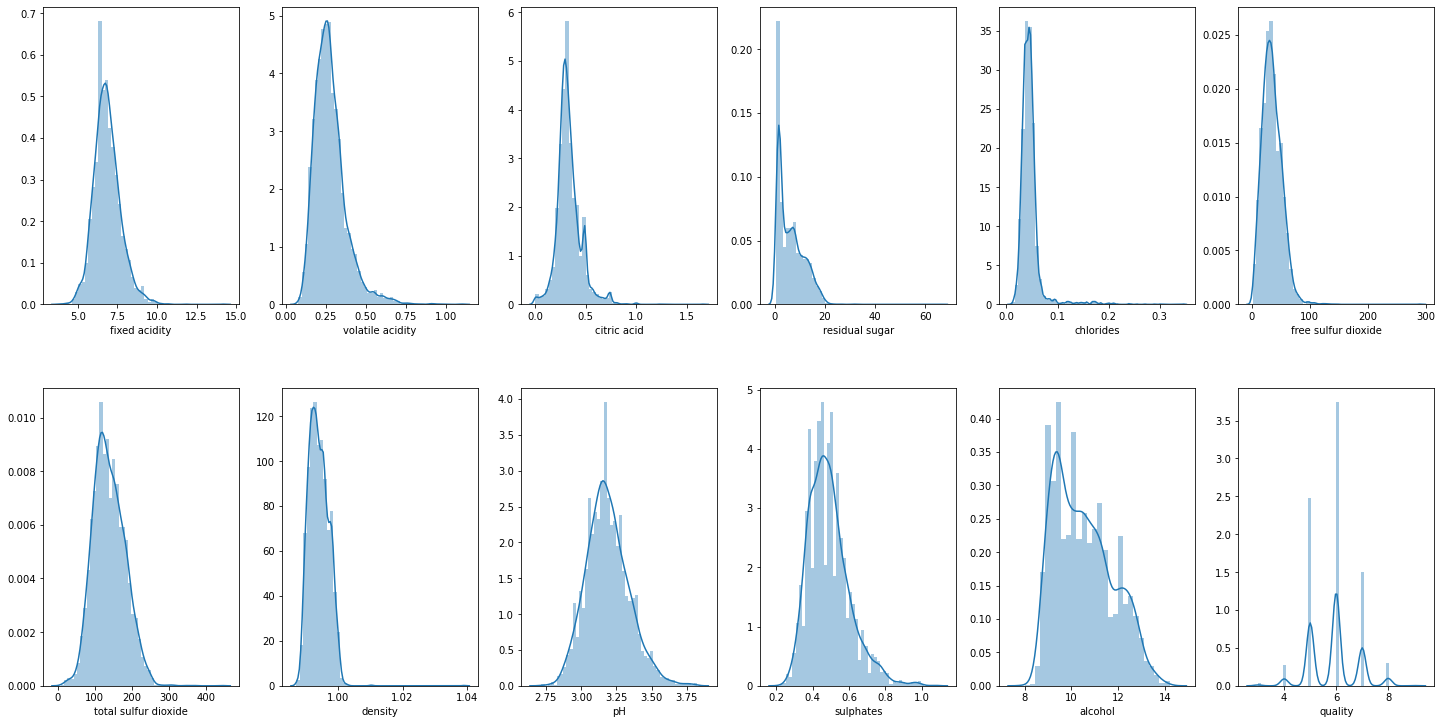

In [8]:
# create distplot
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in df.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)        

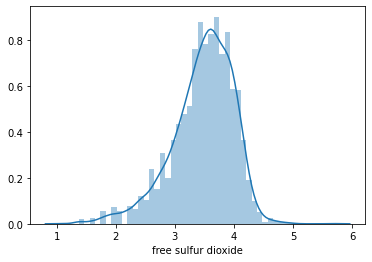

In [9]:
# log transformation
df['free sulfur dioxide']=np.log(1+df['free sulfur dioxide'])
sns.distplot(df['free sulfur dioxide'])

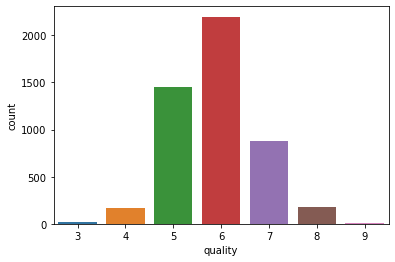

In [10]:
sns.countplot(df['quality'])

# Coorelation Matrix

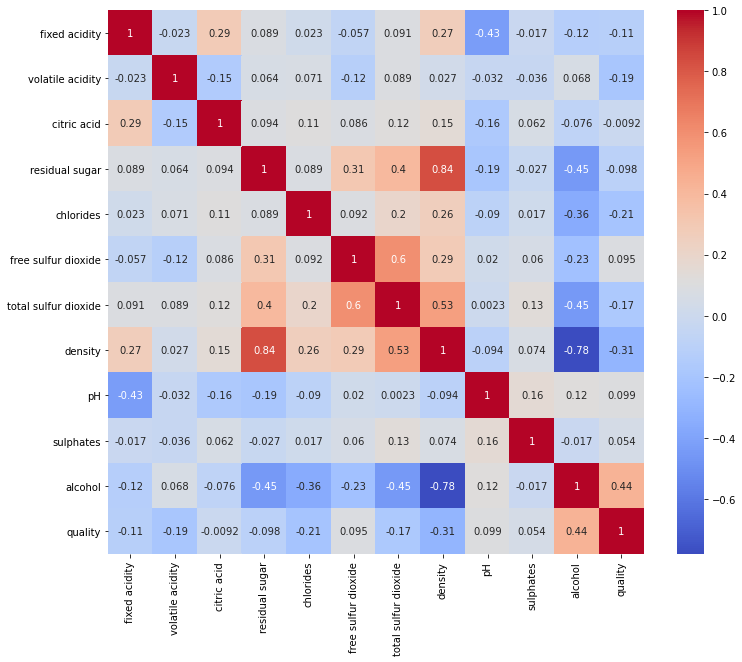

In [11]:
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Input Split

In [12]:
X=df.drop(columns=['quality'])
y=df['quality']


# Clsss Imbalancement

In [13]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# Over Sampling

In [14]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)

# tranform the dataset
X,y=oversample.fit_resample(X,y)


In [15]:
y.value_counts()

7    2198
6    2198
5    2198
4    2198
3    2198
9    2198
8    2198
Name: quality, dtype: int64

# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])

# Normalize Data/Standardize

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

# Model Training

In [18]:
# Classify fuction 
from sklearn.model_selection import train_test_split,cross_val_score

def classify (model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    
    # Trainning Model
    model.fit(X_train,y_train)
    print("Accuracy:",model.score(X_test,y_test)*100)
    
    #Cross Validation Score
    score=cross_val_score(model,X,y,cv=5)
    print("CV Score:",np.mean(score)*100)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)

Accuracy: 53.39225370418508
CV Score: 52.15787636498172


In [21]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy: 80.47829477514948
CV Score: 77.07668013302917


In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy: 88.51052768390953
CV Score: 84.77855467518445


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,y)

Accuracy: 89.16038471536261
CV Score: 85.67544778242141
